# **SSD VGG16 backbone**

> By Thanawat Jaisert

## Make sure that GPU available.

In [ ]:
!nvidia-smi

Tue Oct 22 15:57:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Install Dependencies

In [ ]:
!pip install torch==1.12.0
!pip install albumentations
!pip install torchmetrics

In [ ]:
!git clone -b SSD https://github.com/jamess66/deeplearning-project.git

Cloning into 'deeplearning-project'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 27 (delta 2), reused 9 (delta 1), pack-reused 6 (from 1)
Receiving objects: 100% (27/27), 2.11 MiB | 3.62 MiB/s, done.
Resolving deltas: 100% (2/2), done.


###Import dataset

In [12]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [13]:
from roboflow import Roboflow
rf = Roboflow(api_key="B79emy1DpjbYbHZvlcan")
project = rf.workspace("cabbage-mei23").project("cabbage-k6qvz")
version = project.version(3)
dataset = version.download("voc")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cabbage-3 in voc:: 100%|██████████| 471/471 [00:00<00:00, 2294.62it/s]


In [4]:
!python /content/deeplearning-project/train.py

Number of training samples: 7058
Number of validation samples: 2048
SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
.
.
.
    (regression_head): SSDRegressionHead(
      (module_list): ModuleList(
        (0): Conv2d(512, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Conv2d(1024, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): Conv2d(512, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Conv2d(256, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): Conv2d(256, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (5): Conv2d(256, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
  )
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.482

In [1]:
!python /content/deeplearning-project/eval.py

Validating
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:08<00:00,  7.56it/s]
mAP_50: 91.412
mAP_50_95: 66.290


Save to content/outputs

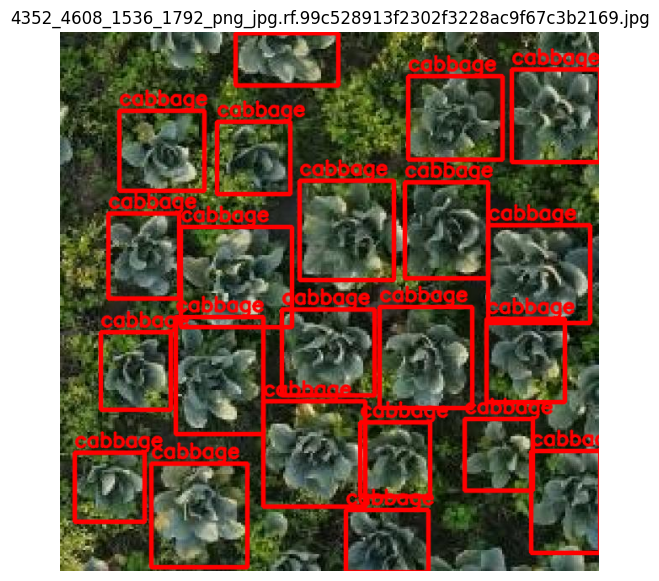

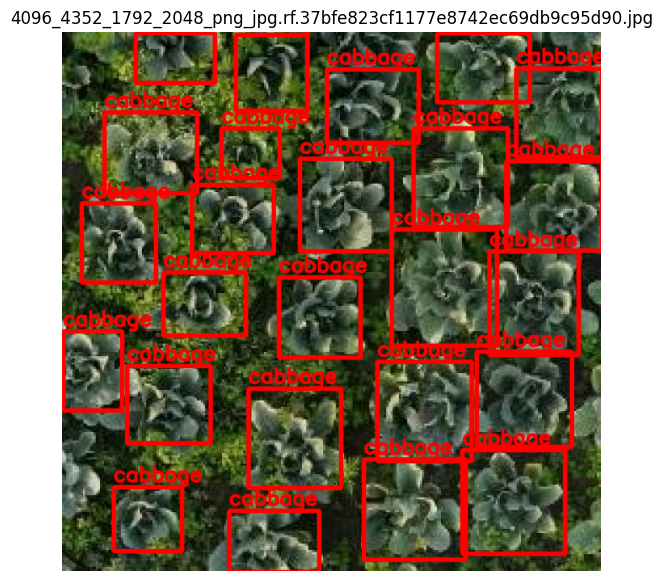

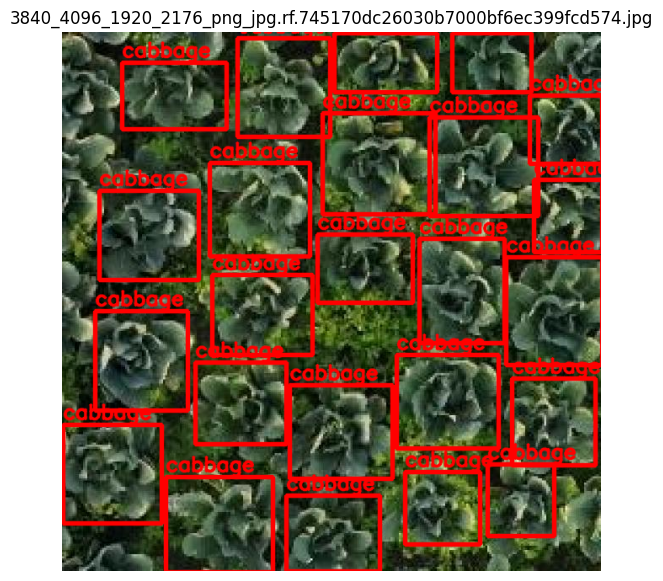

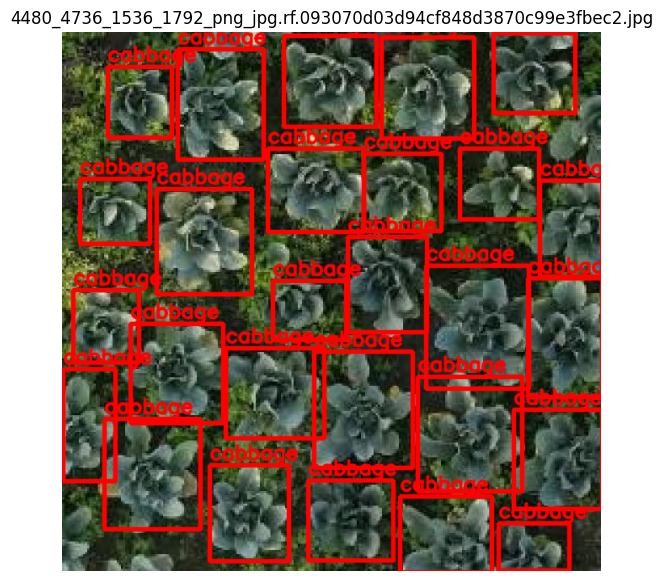

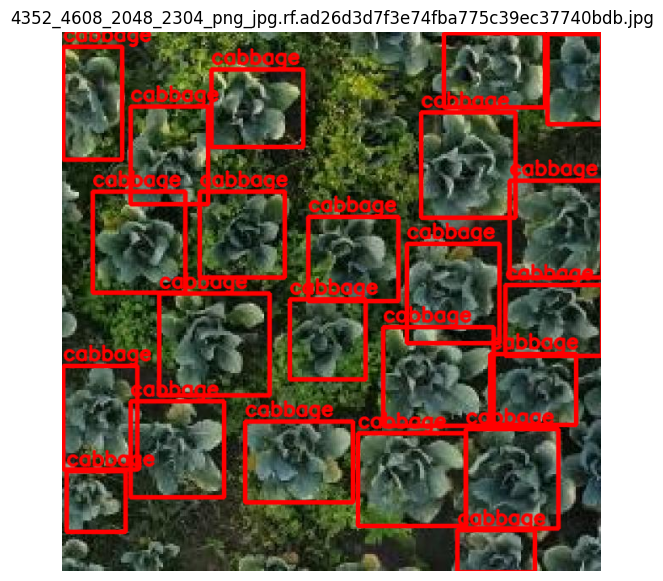

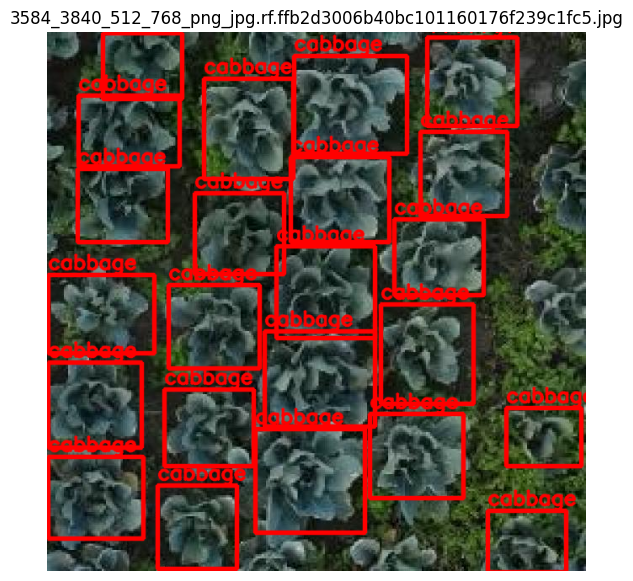

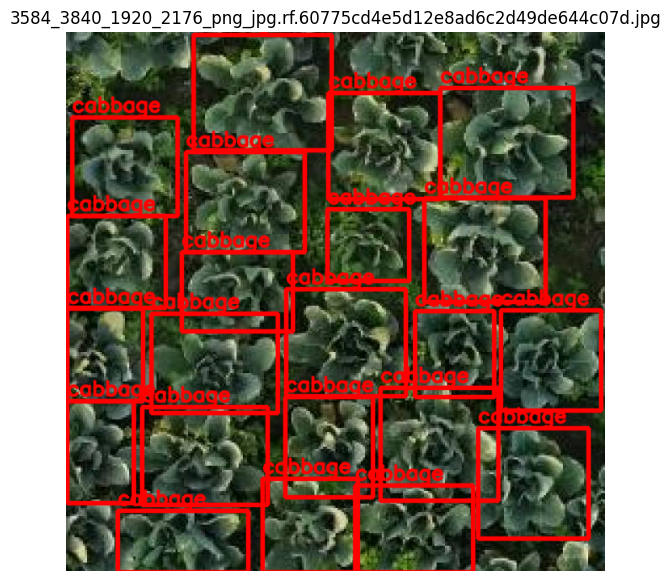

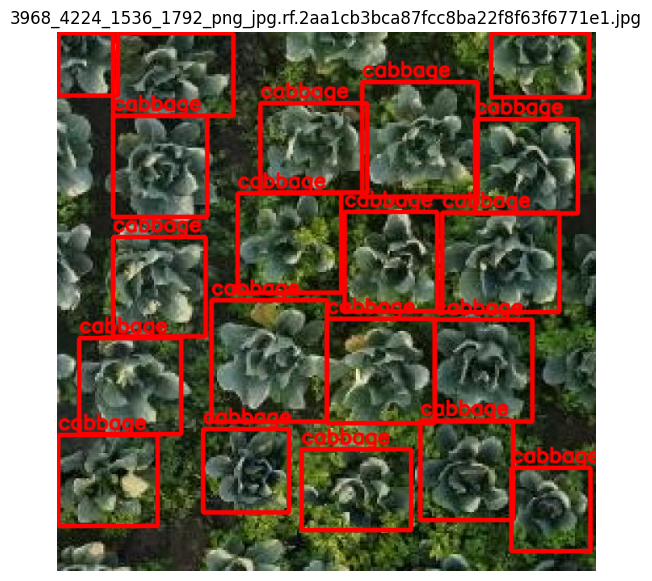

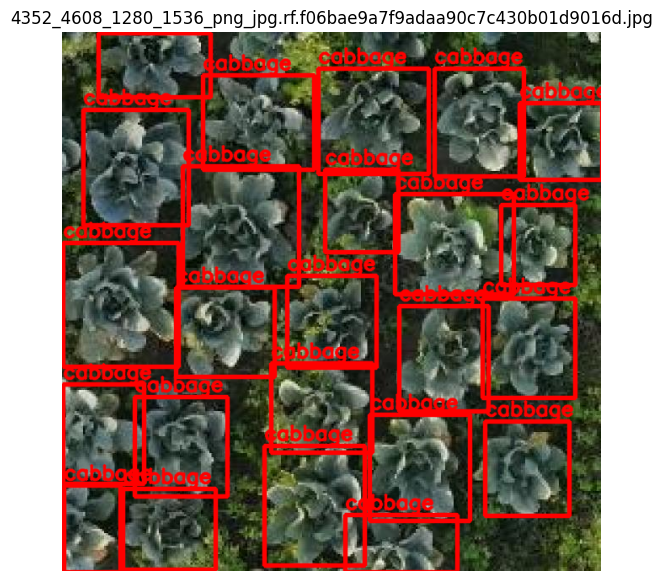

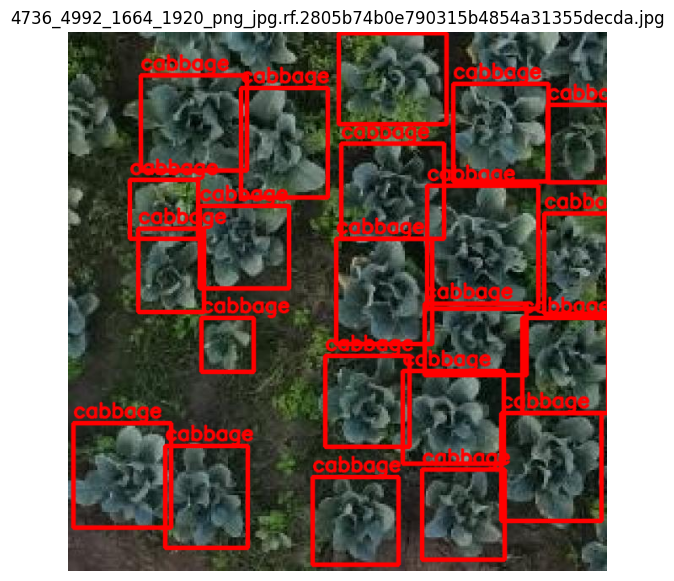

<Figure size 1000x700 with 0 Axes>

In [18]:
!python /content/deeplearning-project/inference.py --input pred_img/ --imgsz 600